Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install geocoder #to gather the adress through the API Service

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import matplotlib
import missingno as msno

ModuleNotFoundError: No module named 'missingno'

In [6]:
train_df = pd.read_csv("C:/Users/exqua/OneDrive/Masaüstü/Crime in Boston Data/crime.csv", encoding= 'latin-1')

In [7]:
train_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [8]:
train_df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

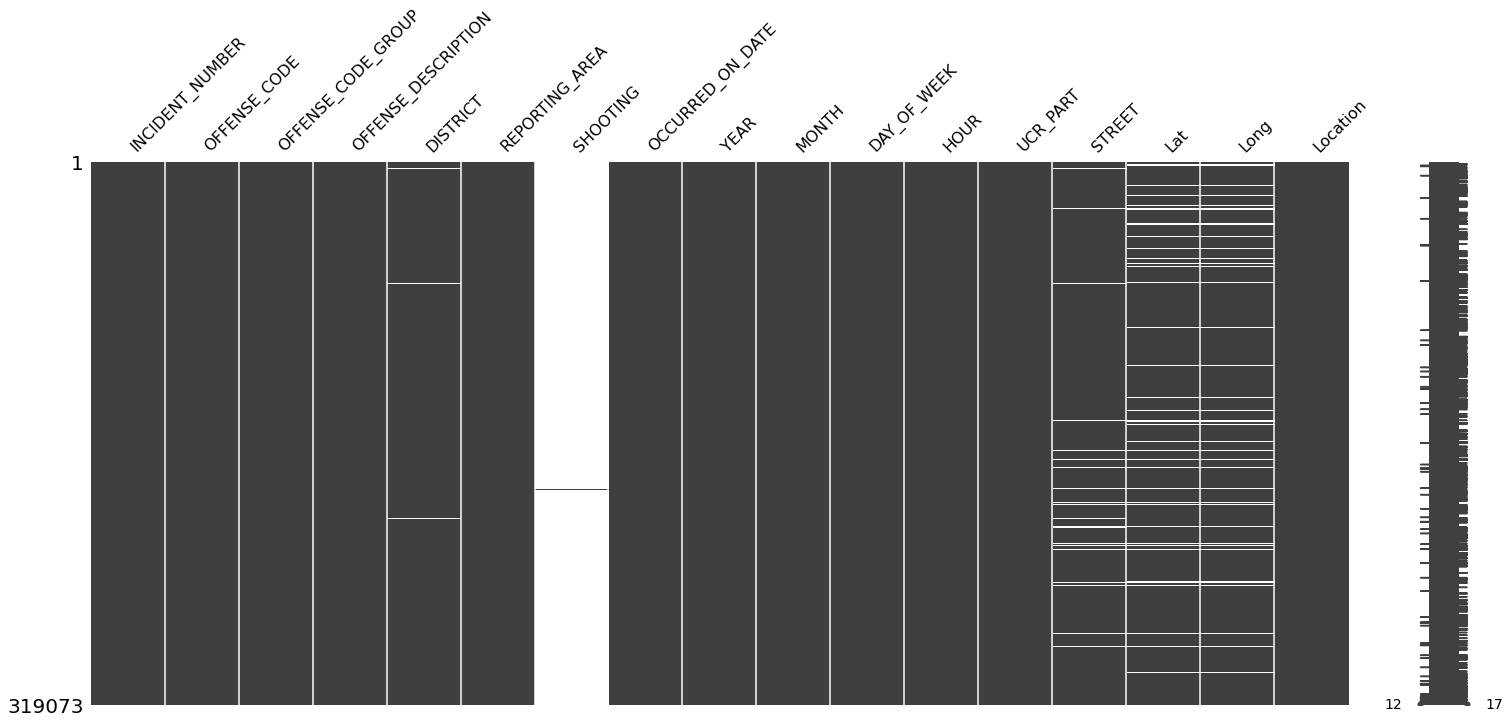

In [10]:
# Visualize the missingness 
msno.matrix(train_df)
plt.show()

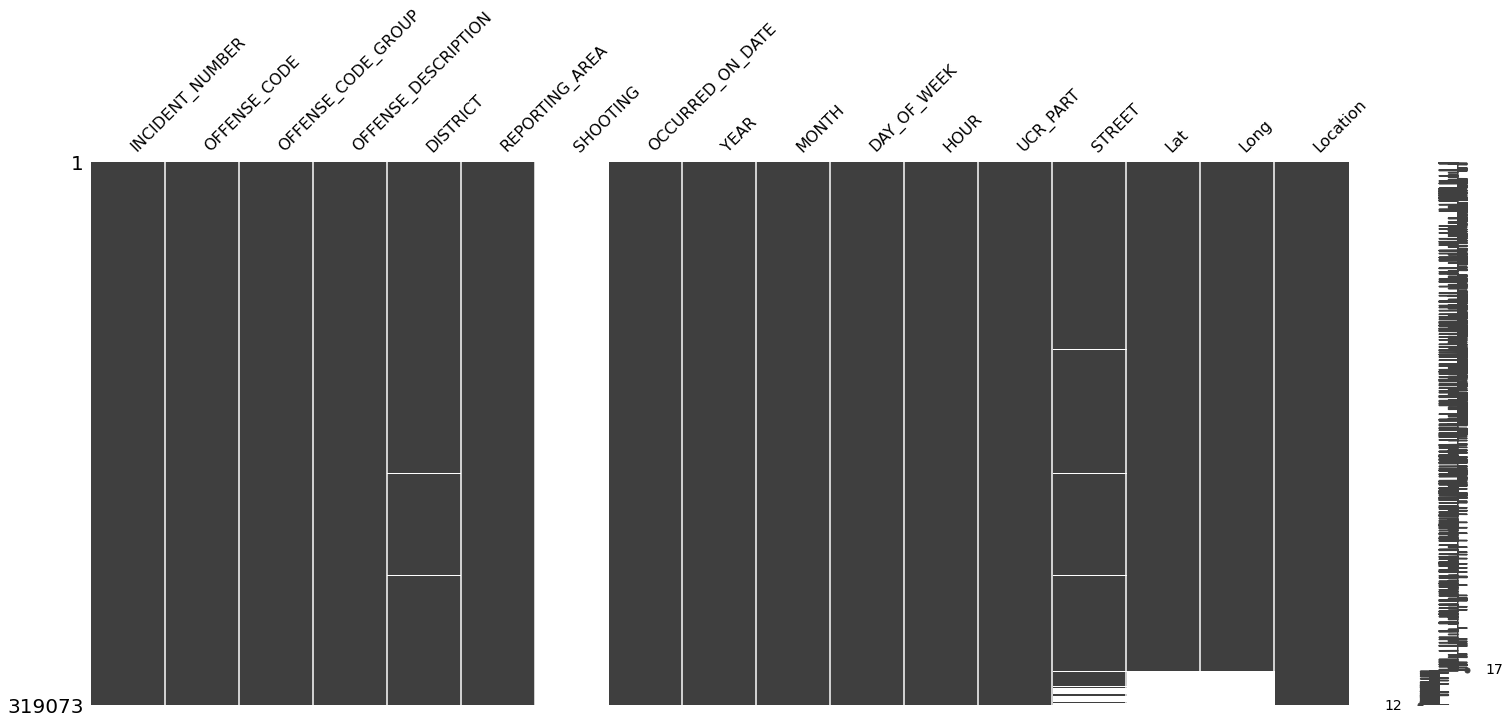

In [11]:
msno.matrix(train_df.sort_values(by = 'Lat')) #To measure the characteristics of the missing values
plt.show()

In [12]:
train_df.isna().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [13]:
# Understand DataFrame with missing values in DISTRICT, SHOOTING, UCR_PART, STREET, Lat and Long
train_df[train_df['Lat'].isna()].describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,19999.000000,19999.000000,19999.000000,19999.000000,0.0,0.0
mean,2632.315166,2016.654333,6.545727,13.046302,NaN,NaN
std,1175.814073,0.930837,3.216478,6.500583,NaN,NaN
min,111.000000,2015.000000,1.000000,0.000000,NaN,NaN
25%,1841.000000,2016.000000,4.000000,9.000000,NaN,NaN
50%,3102.000000,2017.000000,7.000000,14.000000,NaN,NaN
75%,3802.000000,2017.000000,9.000000,18.000000,NaN,NaN
max,3831.000000,2018.000000,12.000000,23.000000,NaN,NaN


## Task 1: Removing the 'I' and '-' from INCIDENT_NUMBER 
We should first check whether every value in that column starts with 'I' or not:

In [14]:
count =0
count2 = 0
iteration =-1
iter_dic= {}
for i in train_df["INCIDENT_NUMBER"]:
    iteration+=1
    if i.startswith("I"):
        count += 1
    else:
        count2+=1
        iter_dic[count2] = iteration

dic = {key: value for key, value in iter_dic.items()}
print(dic)

{1: 319072}


In [15]:
test_index = train_df.iloc[dic[1]] # Testing the index
test_index

INCIDENT_NUMBER                          142052550
OFFENSE_CODE                                  3125
OFFENSE_CODE_GROUP                 Warrant Arrests
OFFENSE_DESCRIPTION                 WARRANT ARREST
DISTRICT                                        D4
REPORTING_AREA                                 903
SHOOTING                                       NaN
OCCURRED_ON_DATE               2015-06-22 00:12:00
YEAR                                          2015
MONTH                                            6
DAY_OF_WEEK                                 Monday
HOUR                                             0
UCR_PART                                Part Three
STREET                               WASHINGTON ST
Lat                                        42.3338
Long                                      -71.0803
Location               (42.33383935, -71.08029038)
Name: 319072, dtype: object

In [16]:
train_df.drop(train_df.index[dic[1]], inplace=True) #Dropping the row that does not start with I

In [17]:
train_df.tail() #see, we don't have this row 319072 anymore

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319067,I060168073-00,3125,Warrant Arrests,WARRANT ARREST,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Three,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [18]:
train_df['INCIDENT_NUMBER'] = train_df['INCIDENT_NUMBER'].str.strip("I") #Now we delete all the I's in incident_number column
# Print header to make sure change was done
train_df['INCIDENT_NUMBER'].head()

0    182070945
1    182070943
2    182070941
3    182070940
4    182070938
Name: INCIDENT_NUMBER, dtype: object

In [19]:
"""Now it is time to count the number of '-' in INCIDENT_NUMBER column"""
count =0
iteration =-1
for i in train_df["INCIDENT_NUMBER"]:
    iteration+=1
    if '-' in i:
        count += 1
print(count)      

353


In [20]:
# Splitting the column into two different columns by '-'
Inc_Add = train_df['INCIDENT_NUMBER'].str.split("-", expand = True)
Inc_Add.head()

,0,1
0,182070945,None
1,182070943,None
2,182070941,None
3,182070940,None
4,182070938,None


In [21]:
# Assign correct columns to INCIDENT and INC_TAIL columns in train_df
train_df['INCIDENT'] = Inc_Add[0]
train_df['INC_TAIL'] = Inc_Add[1]
# Print the header and confirm new column creation
train_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,INCIDENT,INC_TAIL
0,182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",182070945,None
1,182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",182070943,None
2,182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",182070941,None
3,182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",182070940,None
4,182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",182070938,None


In [22]:
len(train_df["INCIDENT"].unique()) # To check the number of unique elements in new column INCIDENT

282516

In [23]:
"""Checking the duplicates:"""
duplicates = train_df.duplicated(subset = 'INCIDENT_NUMBER', keep = False)

In [24]:
train_df[duplicates].sort_values('INCIDENT_NUMBER') # Now we see 64079 rows have duplicate values

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,INCIDENT,INC_TAIL
319070,030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",030217815,08
319069,030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",030217815,08
319066,060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)",060168073,00
319067,060168073-00,3125,Warrant Arrests,WARRANT ARREST,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Three,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)",060168073,00
319064,080542626-00,1848,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,A1,111,NaN,2015-08-12 12:00:00,2015,8,Wednesday,12,Part Two,BOYLSTON ST,42.352312,-71.063705,"(42.35231190, -71.06370510)",080542626,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,182070889,1841,Drug Violation,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Two,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)",182070889,None
40,182070889,3125,Warrant Arrests,WARRANT ARREST,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Three,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)",182070889,None
39,182070889,1843,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Two,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)",182070889,None
28,182070904,2007,Restraining Order Violations,VIOL. OF RESTRAINING ORDER W NO ARREST,C11,242,NaN,2018-09-03 18:34:00,2018,9,Monday,18,Part Two,ANNAPOLIS ST,42.317319,-71.061509,"(42.31731905, -71.06150882)",182070904,None


In [25]:
train_df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
INCIDENT                object
INC_TAIL                object
dtype: object

In [26]:
del train_df["INCIDENT_NUMBER"]  # We don't need that column anymore

In [27]:
train_df.head()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,INCIDENT,INC_TAIL
0,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",182070945,None
1,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",182070943,None
2,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",182070941,None
3,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",182070940,None
4,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",182070938,None


In [28]:
# Inpute missing data
train_df["INC_TAIL"].replace(np.nan, '', inplace = True) 

In [29]:
# Type casting in INCIDENT column
train_df["INCIDENT"] = train_df["INCIDENT"].astype(np.int64) 

In [30]:
#train_df["INC_TAIL"] = train_df["INC_TAIL"].astype(int)

### Task2: Converting the format of the OCCURRED_ON_DATE column to the DateTime

In [31]:
# Convert both columns to datetime
train_df['OCCURRED_ON_DATE'] = pd.to_datetime(train_df['OCCURRED_ON_DATE'], format = '%Y-%m-%d %H:%M:%S')

In [32]:
train_df.head()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,INCIDENT,INC_TAIL
0,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",182070945,
1,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",182070943,
2,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",182070941,
3,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",182070940,
4,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",182070938,


In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319072 entries, 0 to 319071
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   OFFENSE_CODE         319072 non-null  int64         
 1   OFFENSE_CODE_GROUP   319072 non-null  object        
 2   OFFENSE_DESCRIPTION  319072 non-null  object        
 3   DISTRICT             317307 non-null  object        
 4   REPORTING_AREA       319072 non-null  object        
 5   SHOOTING             1019 non-null    object        
 6   OCCURRED_ON_DATE     319072 non-null  datetime64[ns]
 7   YEAR                 319072 non-null  int64         
 8   MONTH                319072 non-null  int64         
 9   DAY_OF_WEEK          319072 non-null  object        
 10  HOUR                 319072 non-null  int64         
 11  UCR_PART             318982 non-null  object        
 12  STREET               308201 non-null  object        
 13  Lat           

In [34]:
train_df.isna().sum()

OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318053
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
INCIDENT                    0
INC_TAIL                    0
dtype: int64

### Task3: Imputing the DISTRICT Column with X

In [35]:
train_df["DISTRICT"].replace(np.nan, 'X', inplace = True)

In [36]:
train_df.isna().sum()

OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                    0
REPORTING_AREA              0
SHOOTING               318053
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
INCIDENT                    0
INC_TAIL                    0
dtype: int64

### Task 4: Turning SHOOTING column to Boolean 1 or 0

In [37]:
train_df['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

In [38]:
train_df['SHOOTING'].replace(np.nan, 'N' , inplace=True)
 # Mapping Shooting
train_df['SHOOTING']=train_df['SHOOTING'].map( {'N': 0 ,'Y': 1} ).astype(int)

In [39]:
train_df['SHOOTING'].unique()

array([0, 1])

### Task 5: Gathering The Right Locations as Latitude and Longitude from Location Column

In [40]:
train_df.drop('Lat', axis = 1, inplace = True) #First we drop the old Lat column

In [41]:
train_df.drop('Long', axis = 1, inplace = True) #Second we drop the old Long column

In [42]:
# Remove "(" and ")" from coordinates
train_df['Location'] = train_df['Location'].str.replace("(","")
train_df['Location'] = train_df['Location'].str.replace(")","")
# Print the header of the column
train_df['Location'].head()

0    42.35779134, -71.13937053
1    42.30682138, -71.06030035
2    42.34658879, -71.07242943
3    42.33418175, -71.07866441
4    42.27536542, -71.09036101
Name: Location, dtype: object

In [43]:
lat_long = train_df['Location'].str.split(",", expand = True) #Then we split them with comma
lat_long.head()

,0,1
0,42.35779134,-71.13937053
1,42.30682138,-71.06030035
2,42.34658879,-71.07242943
3,42.33418175,-71.07866441
4,42.27536542,-71.09036101


In [44]:
train_df['latitude'] = lat_long[0] # Then we create a new longitude and latitude column
train_df['longitude'] = lat_long[1]

In [45]:
del train_df["Location"] # Then we don't need Location column anymore

### Task 6: CONVERTING the REPORTING_AREA column to float:

In [46]:
train_df['REPORTING_AREA'].replace(' ', '0', inplace=True)

In [47]:
train_df['REPORTING_AREA'] = train_df['REPORTING_AREA'].astype(float)

### Task 7: Dealing with the missing values in UCR_PART column

In [48]:
train_df['UCR_PART'].unique()

array(['Part One', 'Part Two', 'Part Three', 'Other', nan], dtype=object)

In [49]:
train_df['UCR_PART'].replace(np.nan, 5 , inplace=True)
train_df['UCR_PART'].replace('Other', 4 , inplace=True)
train_df['UCR_PART'].replace('Part One', 1 , inplace=True)
train_df['UCR_PART'].replace('Part Two', 2 , inplace=True)
train_df['UCR_PART'].replace('Part Three', 3 , inplace=True)

### Task 8: Changing the column names 

In [50]:
rename = {'OFFENSE_CODE_GROUP':'Group',
         'OFFENSE_DESCRIPTION':'Description',
         'DISTRICT':'District',
         'REPORTING_AREA':'Area',
         'SHOOTING':'Shooting',
         'OCCURRED_ON_DATE':'Date',
         'YEAR':'Year',
         'MONTH':'Month',
         'DAY_OF_WEEK':'Day',
         'HOUR':'Hour',
         'STREET':'Street'}
train_df.rename(index=str, columns=rename, inplace=True)

# Check
train_df.head()

,OFFENSE_CODE,Group,Description,District,Area,Shooting,Date,Year,Month,Day,Hour,UCR_PART,Street,INCIDENT,INC_TAIL,latitude,longitude
0,619,Larceny,LARCENY ALL OTHERS,D14,808.0,0,2018-09-02 13:00:00,2018,9,Sunday,13,1,LINCOLN ST,182070945,,42.35779134,-71.13937053
1,1402,Vandalism,VANDALISM,C11,347.0,0,2018-08-21 00:00:00,2018,8,Tuesday,0,2,HECLA ST,182070943,,42.30682138,-71.06030035
2,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,0,2018-09-03 19:27:00,2018,9,Monday,19,3,CAZENOVE ST,182070941,,42.34658879,-71.07242943
3,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272.0,0,2018-09-03 21:16:00,2018,9,Monday,21,3,NEWCOMB ST,182070940,,42.33418175,-71.07866441
4,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,0,2018-09-03 21:05:00,2018,9,Monday,21,3,DELHI ST,182070938,,42.27536542,-71.09036101


In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319072 entries, 0 to 319071
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   OFFENSE_CODE  319072 non-null  int64         
 1   Group         319072 non-null  object        
 2   Description   319072 non-null  object        
 3   District      319072 non-null  object        
 4   Area          319072 non-null  float64       
 5   Shooting      319072 non-null  int32         
 6   Date          319072 non-null  datetime64[ns]
 7   Year          319072 non-null  int64         
 8   Month         319072 non-null  int64         
 9   Day           319072 non-null  object        
 10  Hour          319072 non-null  int64         
 11  UCR_PART      319072 non-null  int64         
 12  Street        308201 non-null  object        
 13  INCIDENT      319072 non-null  int64         
 14  INC_TAIL      319072 non-null  object        
 15  latitude      319072 n

### Task 9: # Visualize the missingness 

In [52]:
train_df.isna().sum()

OFFENSE_CODE        0
Group               0
Description         0
District            0
Area                0
Shooting            0
Date                0
Year                0
Month               0
Day                 0
Hour                0
UCR_PART            0
Street          10871
INCIDENT            0
INC_TAIL            0
latitude            0
longitude           0
dtype: int64

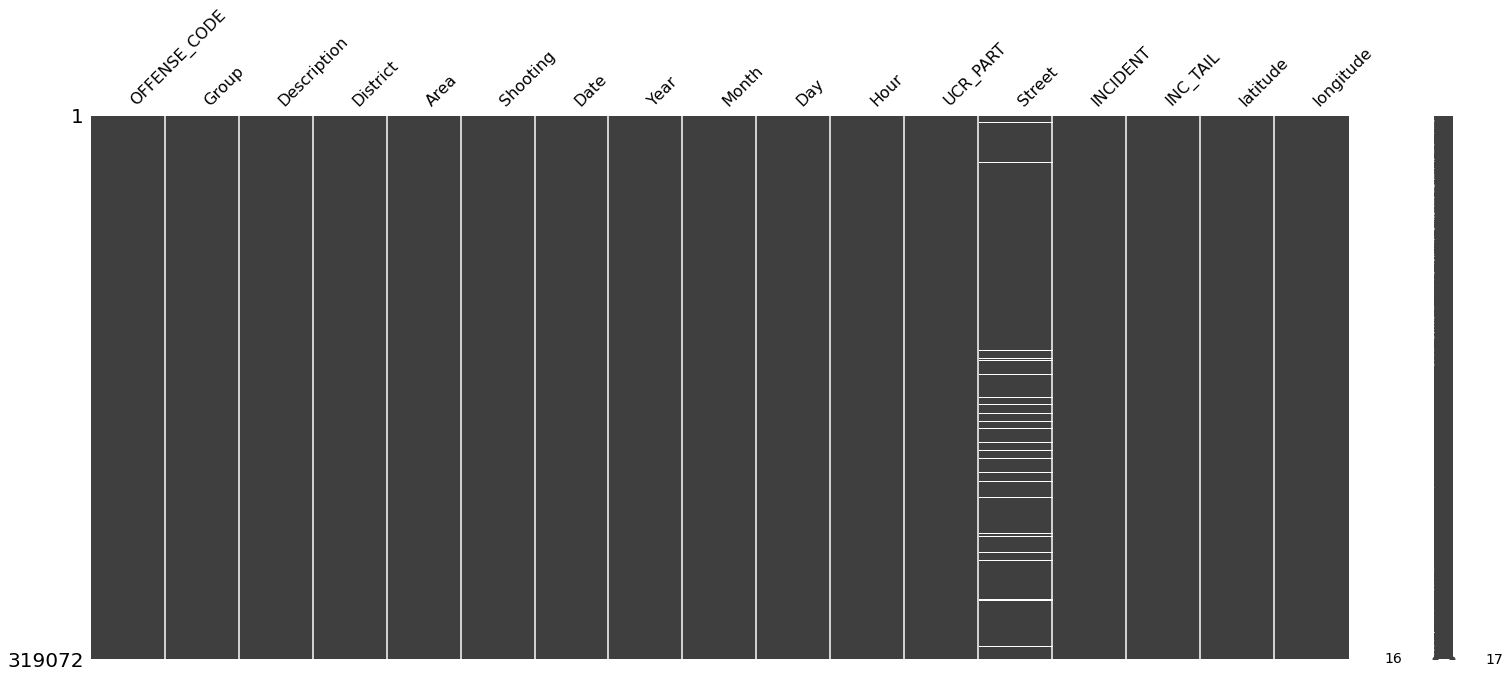

In [53]:
# Visualize the missingness 
msno.matrix(train_df)
plt.show()

### Task 10: Getting the missing location through the use of Google 

In [54]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install reverse_geocoder

Note: you may need to restart the kernel to use updated packages.


In [56]:
import reverse_geocoder as rg 
import pprint 
from geopy.geocoders import Nominatim

In [57]:
train_df.head(2)

,OFFENSE_CODE,Group,Description,District,Area,Shooting,Date,Year,Month,Day,Hour,UCR_PART,Street,INCIDENT,INC_TAIL,latitude,longitude
0,619,Larceny,LARCENY ALL OTHERS,D14,808.0,0,2018-09-02 13:00:00,2018,9,Sunday,13,1,LINCOLN ST,182070945,,42.35779134,-71.13937053
1,1402,Vandalism,VANDALISM,C11,347.0,0,2018-08-21 00:00:00,2018,8,Tuesday,0,2,HECLA ST,182070943,,42.30682138,-71.06030035


In [58]:
geolocator = Nominatim(user_agent="bYvJNzKfOhoBmgnBvTJz4dwanOE4WvqD")

In [59]:
#latitude = train_df["latitude"]
#longitude = train_df["longitude"]
#for i in range(len(latitude)):
#    result = rg.search((latitude[i],longitude[i])) 
# result is a list containing ordered dictionary. 
#    pprint.pprint(result) 

In [60]:
train_df["Street"].replace(np.nan, value = 'a', inplace = True)

In [63]:
indexes = train_df.index[train_df['Street'] == 'a'].tolist()
len(indexes)

10871

In [64]:
train_df["Street"].value_counts()

WASHINGTON ST       14193
a                   10871
BLUE HILL AVE        7794
BOYLSTON ST          7221
DORCHESTER AVE       5149
                    ...  
THOMPSONS ISLAND        1
PAULA RD                1
SUMNER AVE              1
ALMONT                  1
BURROUGHS PL            1
Name: Street, Length: 4658, dtype: int64

In [ ]:
latitude = train_df["latitude"]
longitude = train_df["longitude"]
print(train_df["Street"].iloc[0])

for i in indexes:
    a = latitude[i]
    b = longitude[i]
    lat_long = a,b
    try:
        location = geolocator.reverse(lat_long)
        location_list = location.address.split(",")
        #print(location_list[1])
        train_df.at[i,'Street'] = location_list[1]
    except:
        pass

LINCOLN ST
 Commonwealth Avenue
 Adams Street
 Mount Bowdoin
 Mount Bowdoin
 Mount Bowdoin
 Harvard Street
 Roxbury Crossing
 Columbus Avenue
 330
 Quincy Street
 Mount Bowdoin
 Northampton Street
 Blue Hill Avenue
 Blue Hill Avenue
 Columbia Road
 Gallivan Boulevard
 Tremont Street
 Lourdes Avenue
 West Springfield Street
 West Springfield Street
 Tremont Street
 Tremont Street
 Tremont Street
 Washington Street
 Aberdeen
 Day Square
 Mount Bowdoin
 Washington Street
 Roxbury Crossing
 Massachusetts Avenue Connector
 Massachusetts Avenue
 Newbury Street
 Tremont Street
 300
 Parker Hill Avenue
 Ames Street
 Blue Hill Avenue
 North Beacon Street
 Prentiss Street
 Fields Corner
 62
 Dock Square
 Dock Square
 Roxbury Crossing
 Roxbury Crossing
 Roxbury Crossing
 Tremont Street
 Dock Square
 Everett Street
 Boston
 Huntington Avenue
 173B
 Wales Street
 Nubian Square
 Boylston Street
 150
 Roxbury
 Roxbury Crossing
 Boston
 Cummins Highway
 Olney Street
 720
 Uphams Corner
 Kingston Stree

In [ ]:
train_df.isna().sum()